<a href="https://colab.research.google.com/github/igor-stefan/metodos_numericos_2019/blob/master/ProjetoMQ135.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#Descrição
<p align="justify">Existem módulos de sensores de concentração de gás para arduino que auxiliam no monitoramento da quantidade de determinado gás em um ambiente. Os módulos emitem um sinal analógico variável de acordo com a resistência do sensor, que é convertido para partículas por milhão (ppm) através de uma razão $\frac{Rs}{Ro}$, entre a resistência do sensor no momento em que está sendo realizada uma medida no ambiente (Rs) e a resistência de calibração do sensor em ar limpo, ou em outra condição especificada pelo fabricante (Ro).</p> 

<p align="justify">Desse modo, é importante fazer a análise em pontos críticos da relação entre a razão $\frac{Rs}{Ro}$ e a concentração do gás em ppm. Exemplos de pontos críticos: Valor da razão em condições normais, valor da razão quando satura (tende a infinito) e valor da razão quando se aproxima de zero.</p> 

<p align="justify">Neste trabalho será abordado o módulo de sensor de gás MQ135 que é sensível ao dióxido de carbono (CO2) e também a outros gases como benzeno (C6H6) e amônia (NH3). Para que seja analisado apenas os dados referentes ao dióxido de carbono, é necessário encontrar a equação referente a sua curva presente no <i>datasheet</i>. São apresentados no gráfico de sensibilidade deste módulo algumas curvas, cada uma referente à um gás (Pode ser observado na figura abaixo). Nota-se que a curva é limitada e apresenta apenas alguns pontos, mais um fator pelo qual é necessário encontrar a equação referente à curva de maneira que seja possível utilizar o sensor em todo o seu intervalo de medição (Apesar disso, os intervalos de medição para o dióxido de carbono (CO2) não são mostrados no <i>datasheet</i>, apenas dos outros gases citados).</p>

<img src="https://i.ibb.co/Ld59pc9/mq135.jpg" alt="mq135" style="width:42px;height:42px;border:0;">
<img src="https://i.ibb.co/GW3V9nY/curva-mq135.png" alt="curva-mq135" style="width:42px;height:42px;border:0;">


#O processo
<p align="justify">Para encontrar a equação da curva, foi realizada uma regressão não linear utilizando o <i>software</i> Excel. Foi montada uma tabela com os valores de $\frac{Rs}{Ro}$ e os respectivos valores de concentração em ppm, em seguida foi plotado um gráfico para melhor visualização dos pontos e por fim, observada a linha de tendência e escolhida a que melhor representa a curva do gráfico. Foram selecionados os tipos de linha de tendência de uma função potência ($a\times x^{b}$) e uma função polinômio de quarto grau  ($ax^{4}+bx^{3}+cx{^2}+dx+e$). O resultado é apresentado nas imagens abaixo. Nestas equações, Y é a concentração em ppm, X é a razão $\frac{Rs}{Ro}$. As equações encontradas foram: <p>Potência: $Y = 127\times X^{-2,849}$ </p> <p>Polinômio: $Y = -22,72X^{4} + 60,62X^{3} + 189,14X^{2} - 763,51X + 668,15$ </p> </p>
<p align="justify"> Imagem da regressão da função potência</p> 
<img src="https://i.ibb.co/0Qw1k0W/regressao-mq135.png" alt="regressao-mq135" style="width:10px;height:10px;">
<p align="justify"> Imagem da regressão da função polinômio</p>
<img src="https://i.ibb.co/Wy96T6L/regressao-polinomial-mq135.png" alt="regressao-polinomial-mq135" style="width:10px;height:10px;" >

#Objetivo
<p align="justify">O objetivo deste trabalho foi analisar o valor da razão $\frac{Rs}{Ro}$ quando o sensor está presente em ar limpo, que pode ser chamado de valor típico, ou valor em condições normais. Segundo o site <a href="https://pt.co2.earth/">CO2.earth</a> a média de Agosto de 2019 da concentração de dióxido de carbono em ar limpo foi de 409,95 ppm. Portanto, para fins práticos, o valor adotado para esta condição foi 410 ppm.</p>
<p align="justify">Desse modo, foi necessário encontrar o valor de X, tal que Y fosse igual a 410 ppm. Tornando um dos membros das equações igual a zero, encontrou-se uma função cuja raíz é o valor da razão procurado.</p>
<p>$Y = 127\times X^{-2,849}$</p>
$410 = 127\times X^{-2,849}$</p>
$127\times X^{-2,849} - 410 = 0$</p>
<p>Então para a função potência:</p>
$f(X)= 127\times X^{-2,849}-410$
<p>De modo análogo para a função polinomial:</p>
$f(X)= -22,72X^{4}+60,62X^{3}+189,14X^{2}-763,51X+258,15$

Para encontrar o valor de X foram utilizados os métodos da bisseção, que possui convergência garantida e o método de Newton que possui uma convergência mais rápida, porém não garantida. Foram realizadas comparações entre os dois métodos.

#Início

<p>Foi necessário importar as bibliotecas numpy e matplotlib para auxiliar nos cálculos e na produção de gráficos.</p>

In [0]:
import numpy as np
import matplotlib.pyplot as plt

##Segundo passo
<p>Criar uma função para plotar gráficos, as funções que fazem o cálculo das raízes e as funções potência e polinômio</p>

In [0]:
def plotar_grafico(x1,x2,i,f):
  intervalo=[] #cria um vetor para intervalo
  y=[] #cria um vetor para receber os valores de f(x)
  intervalo = np.arange(x1,x2,i); #associa o intervalo ao vetor
  for j in intervalo: #itera j no intervalo
    y.append(f(j)); #adiciona em y os valores calculados de f(j)
  plt.plot(intervalo,y); #plota o grafico x,y
  plt.grid(True); 
  plt.show();
  
def potencia(x):
  return (127*(1/(x**2.849)))-410; #funcao potencia

def polinomio(x):
  return -22.72*(x**4)+60.62*(x**3)+189.14*(x**2)-763.51*x+258.15; #funcao polinomio

def bissec(x1,x2,max_it,eps,f): #metodo da bissecao
  xm=[];
  it=0;
  erro=[];
  if (f(x1)*f(x2) > 0):
    print("Não é possível calcular as raízes com os valores de x1 e x2 dados");
    return;
  for i in range(max_it):
    it=it+1;
    xm.append((x1+x2)/2)
    if f(x1)*f(xm[i]) < 0:
      x2 = xm[i];
    else:
      x1 = xm[i];
    if i != 0:
      erro.append(np.abs(((xm[i]-xm[i-1])/(xm[i]))*100))
      if(erro[-1]<eps):
        break;
  print(xm[-1])
  print("Número de iterações necessárias: {}".format(it))
  print("Grafico das raízes encontradas: ")
  plt.plot(erro)
  plt.grid(True)
  plt.show()
  

def derivada_potencia(ponto): #derivada que deve ser utilizada no metodo de newton
  return -361.823*(ponto**-3.849);

def derivada_polinomio(ponto): #derivada que deve ser utilizada no metodo de newton
  return -90.88*(ponto**3)+181.986*(ponto**2)+378.28*ponto-763.51;

def newton_potencia(x1,max_it,eps,f): #metodo de newton
  it=0;
  xm=[x1];
  erro=[x1];
  for j in range(max_it):
    it=it+1;
    xm.append(xm[-1]-(f(xm[-1])/derivada_potencia(xm[-1])));
    erro.append((np.abs((xm[j]-xm[j-1])/xm[j]))*100);
    if(erro[-1]<eps):
      break;
  print(xm[-1])
  print("Número de iterações necessárias: {}".format(it))
  print("Grafico das raízes encontradas: ")
  plt.plot(xm) #colocar plot(erro) para gráfico do erro
  plt.grid(True)
  plt.show()
  
def newton_polinomio(x1,max_it,eps,f): #metodo de newton
  it=0;
  xk=[x1];
  erro=[x1];
  for j in range(max_it):
    it=it+1;
    xk.append(xk[-1]-(f(xk[-1])/derivada_polinomio(xk[-1])));
    erro.append((np.abs((xk[j]-xk[j-1])/xk[j]))*100);
    if(erro[-1]<eps):
      break;
  print(xk[-1])
  print("Número de iterações necessárias: {}".format(it))
  print("Grafico das raízes encontradas: ")
  plt.plot(xk) #colocar plot(erro) para gráfico do erro
  plt.grid(True)
  plt.show()
  
def cordas(x1,x2,max_it,eps,f): #metodo das cordas
  xm=[];
  it=0;
  erro=[];
  if (f(x1)*f(x2) > 0):
    print("Não é possível calcular as raízes com os valores de x1 e x2 dados");
    return;
  for i in range(max_it):
    it=it+1;
    xm.append(x2+(f(x2)/(f(x1)-f(x2)))*(x2-x1))
    if(f(x1)*f(xm[i]) < 0):
      x2 = xm[i];
    else:
      x1 = xm[i];
    if i != 0:
      erro.append((np.abs((xm[i]-xm[i-1])/xm[i]))*100)
      if(erro[-1]<eps):
        break;
  print(xm[-1])
  print("Número de iterações necessárias: {}".format(it))
  print("Grafico das raízes encontradas: ")
  plt.plot(xm)
  plt.grid(True)
  plt.show()

def secante(x1,x2,max_it,eps,f):
  it=0;
  xm=[x1,x2];
  erro=[x1,x2];
  for j in range(max_it):
    it=it+1
    xm.append(xm[j+1]-((f(xm[j+1])*(xm[j+1]-xm[j]))/(f(xm[j+1])-f(xm[j]))));
    erro.append((np.abs((xm[j]-xm[j-1])/xm[j]))*100);
    if(erro[-1]<eps):
      break;
  print(xm[-1])
  print("Número de iterações necessárias: {}".format(it))
  print("Grafico das raízes encontradas: ")
  plt.plot(xm) #colocar plot(erro) para gráfico do erro
  plt.grid(True)
  plt.show()



##Plotando os gráficos de ambas as funções
<p align = "justify">Para a função potência foi escolhido um intervalo entre 0.2 e 1.</p> Para a função polinômio foi escolhido o intervalo entre -5.0 e 5.0.

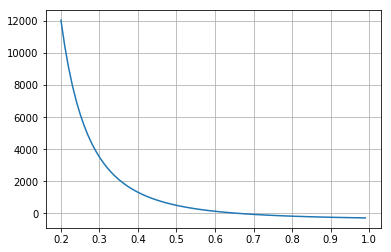

In [0]:
plotar_grafico(0.2,1.0,0.01,potencia) #plota o gráfico da função potência


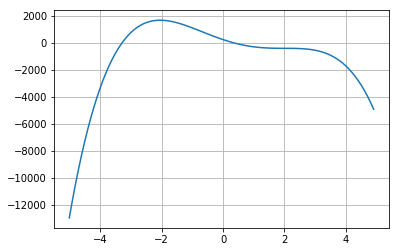

In [0]:
plotar_grafico(-5.0,5.0,.1,polinomio) #plota o gráfico da função polinômio

##Quarto passo - Aplicando o método da bisseção
<p align="justify">Neste passo foi aplicado o método da bisseção em ambas as funções. O método requer a escolha de um intervalo em que haja pelo menos uma raíz entre os números desse intervalo, os extremos desse intervalo foram escolhidos de acordo com os gráficos apresentados. Para a função <b>polinômio</b> foi escolhido o intervalo entre <b>-3.8 e -2,5</b> e para a função <b>potência</b> foi escolhido o intervalo entre <b>0,5 e 0,8</b>.</p>


0.662762451171875
Número de iterações necessárias: 14
Grafico das raízes encontradas: 


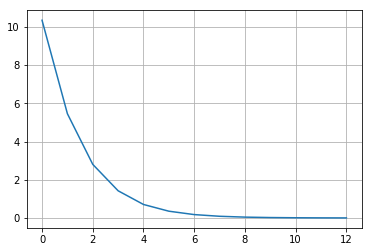

In [0]:
eps=0.005
xi=0.5
xf=0.8
bissec(xi,xf,100,eps,potencia)

-3.28885498046875
Número de iterações necessárias: 13
Grafico das raízes encontradas: 


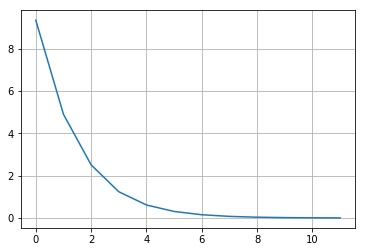

In [0]:
eps=0.005
xi1=-3.8
xf2=-2.5
bissec(xi1,xf2,100,eps,polinomio)

##Quinto passo - Aplicando o método de Newton
<p align="justify">Para fazer a comparação entre os métodos, foi utilizado o método de Newton para encontrar as raízes.O método requer a escolha de um ponto arbitrário e quanto mais próximo da raíz estiver o ponto, mais rápido o método deve encontrar a raíz. Para a função <b>polinômio</b> foi escolhido o ponto <b>-3,8</b> e para a função <b>potência</b> foi escolhido o ponto <b>0,8<b/>.</p>

0.6627470353561761
Número de iterações necessárias: 6
Grafico das raízes encontradas: 


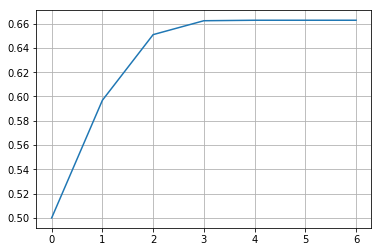

In [0]:
ponto1=0.5
eps=0.005
newton_potencia(ponto1,100,eps,potencia)

-3.2889704363713297
Número de iterações necessárias: 6
Grafico das raízes encontradas: 


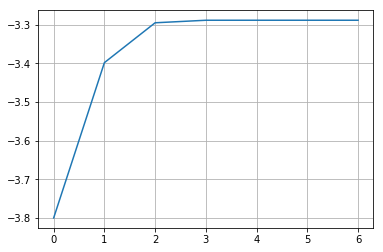

In [0]:
ponto2=-3.8
eps=0.0005
newton_polinomio(ponto2,100,eps,polinomio)

##Sexto passo - Método das cordas
<p align="justify">Este método requer um intervalo no qual haja uma raíz entre seus extremos assim como o método da bisseção. Para fins de comparação foram utilizados os mesmos intervalos. Para a função <b>polinômio</b> foi escolhido o intervalo entre <b>-3.8 e -2,5</b> e para a função <b>potência</b> foi escolhido o intervalo entre <b>0,5 e 0,8</b>.</p>

0.6627614892427552
Número de iterações necessárias: 11
Grafico das raízes encontradas: 


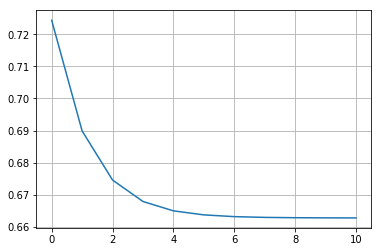

In [0]:
xi=0.5;
xf=0.8;
eps=0.005;
cordas(xi,xf,100,eps,potencia);

-3.288953480218143
Número de iterações necessárias: 8
Grafico das raízes encontradas: 


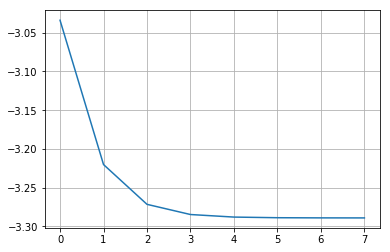

In [0]:
xi=-3.8
xf=-2.5
eps=0.005
cordas(xi,xf,100,eps,polinomio)

##Sétimo passo - Método da secante
<p align="justify"> O método da secante requer um intervalo para que se possa dar inicio ao método, porém não necessariamente precisa existir uma raíz no intervalo escolhido. Para fins de comparação o intervalo utilizado foi o mesmo dos métodos anteriores, na função <b>polinômio</b> foi escolhido o intervalo entre <b>-3.8 e -2,5</b> e na função <b>potência</b> foi escolhido o intervalo entre <b>0,5 e 0,8</b>. </p>

0.6627470353561761
Número de iterações necessárias: 8
Grafico das raízes encontradas: 


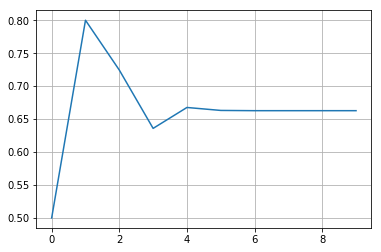

In [0]:
xi=0.5
xf=0.8
eps=0.005
secante(xi,xf,100,eps,potencia);

-3.2889704363713275
Número de iterações necessárias: 8
Grafico das raízes encontradas: 


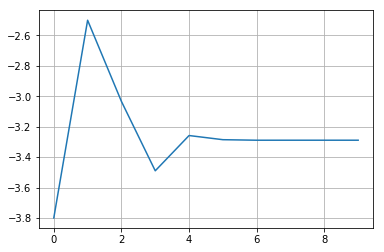

In [0]:
xi=-3.8
xf=-2.5
esp=0.005
secante(xi,xf,100,eps,polinomio)

#Comparação gráfica do número de interações necessárias
##Função potência
<p align="justify"> É possível notar pelo gráfico abaixo que o método de Newton foi o que convergiu mais rápido para as raízes quando a análise foi feita para a função potência </p>

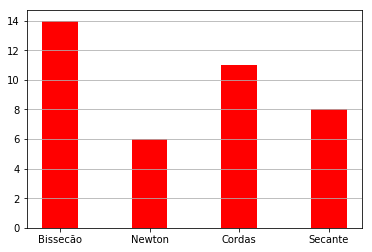

In [0]:
#comparação do número de interações necessárias para encontrar a raíz em cada método para função potência
y = [14,6,11,8] 
x = ["Bissecão","Newton","Cordas","Secante"]
widthb = 0.4
colorb = 'red'

plt.bar(x, y, width=widthb, color=colorb)
plt.grid(axis='y')
plt.show()

##Função polinômio
<p align="justify">Assim como na função potência, o método de Newton foi o que convergiu mais rápido para a raíz, seguido pelo método da secante, método das cordas e método da bisseção. Um comparativo pode ser observado no gráfico abaixo</p>

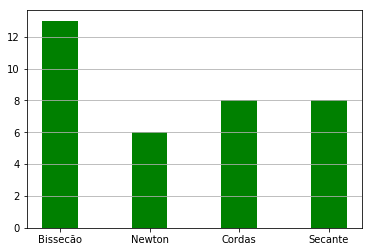

In [0]:
#comparação do número de interações necessárias para encontrar a raíz em cada método para função polinômio
y = [13,6,8,8] 
x = ["Bissecão","Newton","Cordas","Secante"]
widthb = 0.4
colorb = 'green'

plt.bar(x, y, width=widthb, color=colorb)
plt.grid(axis='y')
plt.show()

#Conclusão
<p align="justify">As raízes encontradas foram muito próximas, em cada método foi definida a precisão de três casas decimais no parâmetro de chamada da função que executa cada método."eps=0.005".</p>
<p align="justify">O <b>método de Newton</b> foi o que convergiu mais rápido. Sendo 57% mais rápido que o método da bisseção, 45% mais rápido que o método das cordas e 25% mais rápido que o método da secante para a <b>função potência</b>.</p>
<p align="justify">Em comparação à <b>função polinômio</b>, o método de Newton foi 53% mais rápido que o método da bisseção e 25% mais rápido que os métodos das cordas e da secante.<p/>
<p align="justify">Os <b>métodos da secante e método das cordas</b> apresentaram velocidade de convergência iguais para a <b>função polinômio.</b> Porém para a <b>função potência</b> o método da secante convergiu mais rápido (cerca de 27% mais veloz).<p/>
<p align="justify">O <b>método da bisseção</b> foi o mais lento para ambos os tipos de funções.<p/>